In [ ]:
'''
Objective:
To develop a machine learning model that classifies restaurant reviews as 
positive or negative using Natural Language Processing (NLP). 
The system aims to provide actionable insights into customer 
sentiments to aid decision-making and enhance service quality.

Constraints
The model's accuracy depends on data quality and balance.
Slang, sarcasm, and text nuances may reduce prediction accuracy.
Performance may drop on unseen data or domains.
High computational requirements for large datasets or real-time use.

Conclusion
The project classifies restaurant reviews with 80% accuracy using NLP 
and machine learning. It provides insights into customer sentiments, 
aiding service improvement. Expanding datasets and using advanced models can further enhance performance.
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.shape

(1000, 2)

In [7]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [8]:
data['char_count'] = data['Review'].apply(len)
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [9]:
data['word_count']=data['Review'].apply(lambda x :len(str(x)))
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,24
1,Crust is not good.,0,18,18
2,Not tasty and the texture was just nasty.,0,41,41
3,Stopped by during the late May bank holiday of...,1,87,87
4,The selection on the menu was great and so wer...,1,59,59


In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [11]:
import nltk
print(nltk.__version__)

3.8.1


In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
data['sent_count']=data['Review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [14]:
data.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,24,2
1,Crust is not good.,0,18,18,1
2,Not tasty and the texture was just nasty.,0,41,41,1
3,Stopped by during the late May bank holiday of...,1,87,87,1
4,The selection on the menu was great and so wer...,1,59,59,1


In [15]:
#Average char count for positive reviews
data[data['Liked']==1]['char_count'].mean()

55.88

In [16]:
#Average char count for negative reviews
data[data['Liked']==0]['char_count'].mean()

60.75

In [17]:
#negative revies are higher than positive

In [18]:
import re

In [19]:
data['Review'][1]

'Crust is not good.'

In [20]:
review=re.sub('[^a-zA-Z]',' ',data['Review'][1])

In [21]:
review

'Crust is not good '

In [22]:
review=review.lower()
review

'crust is not good '

In [23]:
review=review.split()
review

['crust', 'is', 'not', 'good']

In [24]:
from nltk.corpus import stopwords

In [25]:
all_stopwords=stopwords.words("english")
all_stopwords.remove('not')

In [26]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
review=[word for word in review if word not in set(all_stopwords)]
review

['crust', 'not', 'good']

In [28]:
#Stemming

In [29]:
from nltk .stem.porter import PorterStemmer

In [30]:
ps=PorterStemmer()

In [31]:
review = [ps.stem(word) for word in review]

In [32]:
review =" ".join(review)

In [33]:
review

'crust not good'

In [34]:
import re

In [35]:
custom_stopwords={'don',"don't",'ain',"aren't","couldn't",'didn',"didn't","doesn't","hadn","hadn't",
                  "hasn't","hasn't","haven","haven't","isn't","na","mighten","mightn't","mustn't","mustn",
                  "needn","needn't","shan","shan't","no","shouldn't","shouldn","wasn","wasn't","weren",
                  "weren't","won","won't","wouldn","wouldn't","not","nasty",""}
corpus=[]
ps=PorterStemmer()
stop_words = set(stopwords.words("english"))-custom_stopwords

for i in range(len(data)):
    review=re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stop_words]
    review =" ".join(review)
    corpus.append(review)

In [36]:
data['processed_text']=corpus

In [37]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,24,2,wow love place
1,Crust is not good.,0,18,18,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,41,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,87,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,59,1,select menu great price


In [38]:
!pip install wordcloud

In [39]:
from wordcloud import WordCloud

In [40]:
wc= WordCloud(width=500,height=500,min_font_size=8,background_color="white")

In [41]:
positive= wc.generate(data[data["Liked"]==1]["processed_text"].str.cat(sep=" "))

In [42]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,24,2,wow love place
1,Crust is not good.,0,18,18,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,41,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,87,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,59,1,select menu great price


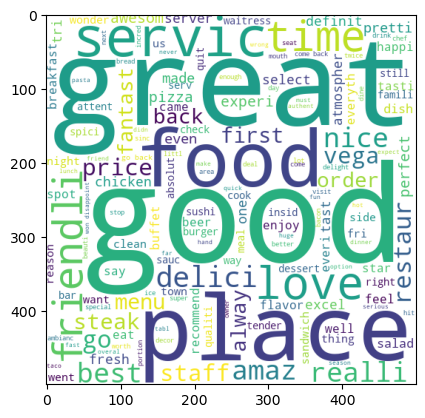

In [43]:
plt.imshow(positive)

In [44]:
negative= wc.generate(data[data["Liked"]==0]["processed_text"].str.cat(sep=" "))


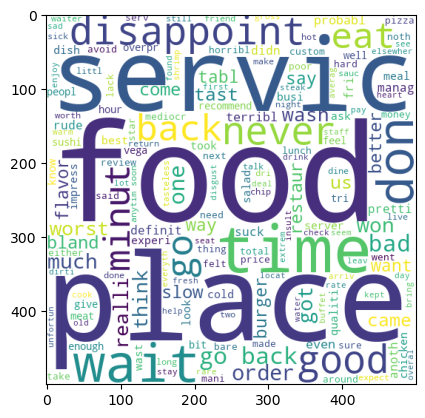

In [45]:
plt.imshow(negative)

In [46]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,24,2,wow love place
1,Crust is not good.,0,18,18,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,41,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,87,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,59,1,select menu great price


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv=CountVectorizer(max_features=1500)

In [49]:
X=cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
X.shape

(1000, 1500)

In [51]:
y=data['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,y_pred)

0.675

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.79

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.79

In [60]:
import joblib

In [61]:
joblib.dump(rf,"Restaurant_review_model")

['Restaurant_review_model']